In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [495]:
df=pd.read_csv("employment.csv",parse_dates=True,index_col="datestamp")
df.head()
df_1=pd.read_csv("employment.csv",parse_dates=True)

In [496]:
df.describe()


,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


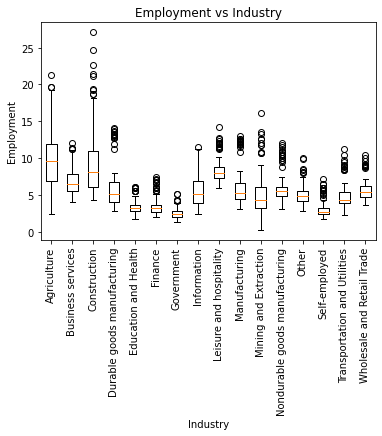

In [497]:
'''Generate a boxplot to find the distribution of unemployment rate for every industry .'''
industry={}
for i in df:
    industry[i]=df_1[i]
ax=plt.boxplot([x for x in industry.values()],labels=[x for x in industry.keys()])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Employment')
plt.title('Employment vs Industry')
plt.show()

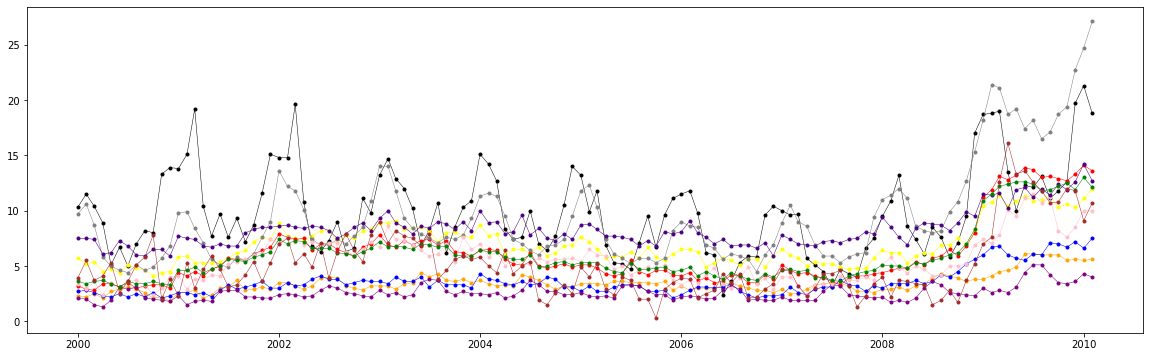

In [498]:
'''Using line chart Visualize the unemployment rate of workers by industry .'''
df_semi=df.resample("M").mean()
start, end = '2000-01', '2010-02'
fig,ax = plt.subplots(figsize=(20, 6))
ax.plot(df.loc[start:end, 'Agriculture'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df.loc[start:end, 'Business services'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='yellow')
ax.plot(df.loc[start:end, 'Education and Health'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='orange')
ax.plot(df.loc[start:end, 'Finance'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='blue')
ax.plot(df.loc[start:end, 'Durable goods manufacturing'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='red')
ax.plot(df.loc[start:end, 'Construction'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='grey')
ax.plot(df.loc[start:end, 'Government'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='purple')
ax.plot(df.loc[start:end, 'Information'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='pink')
ax.plot(df.loc[start:end, 'Leisure and hospitality'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='indigo')
ax.plot(df.loc[start:end, 'Manufacturing'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='green')
ax.plot(df.loc[start:end, 'Mining and Extraction'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='brown')

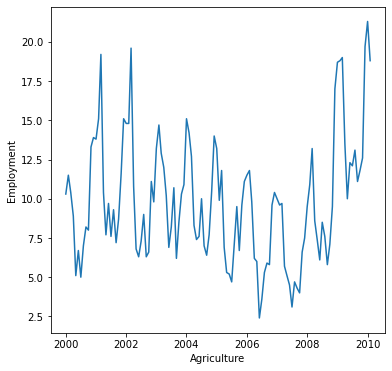

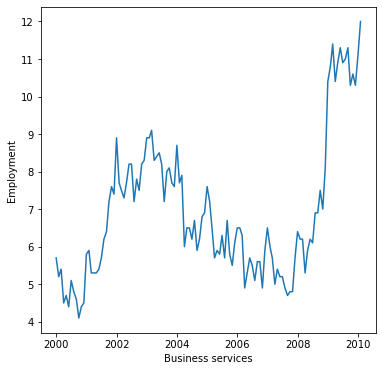

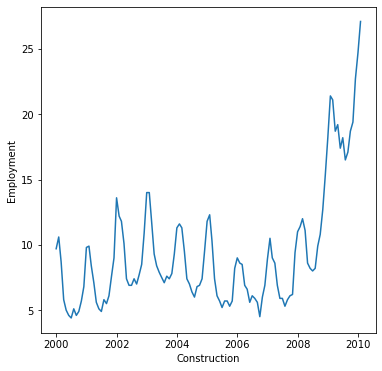

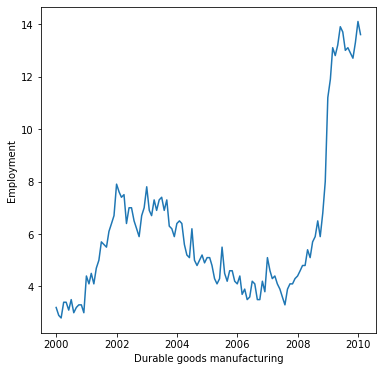

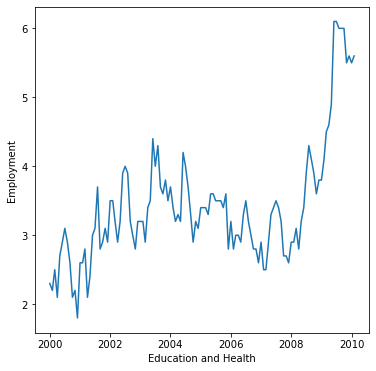

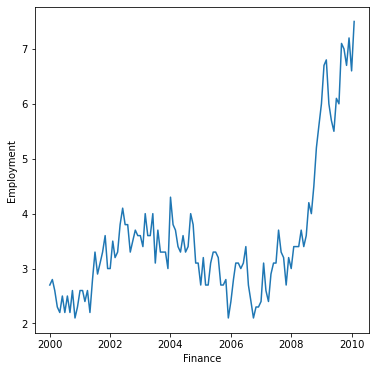

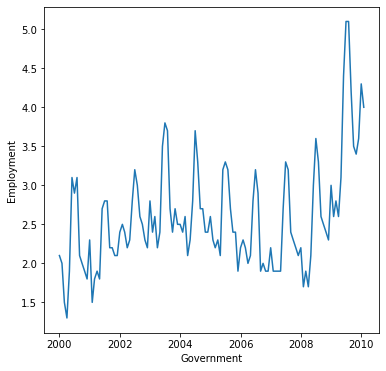

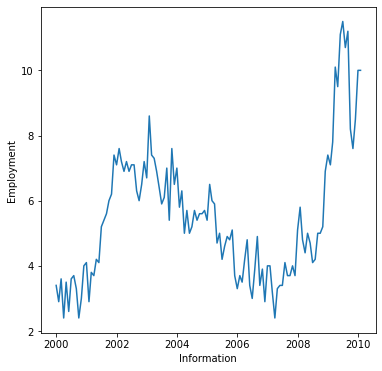

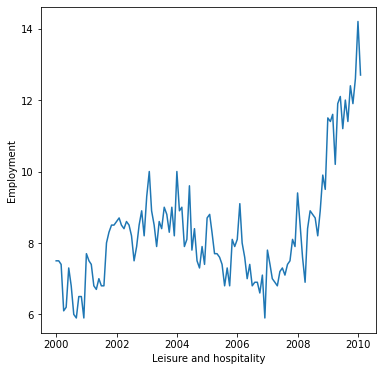

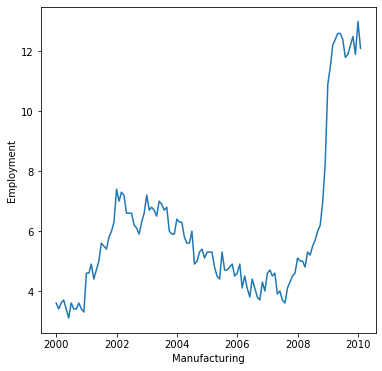

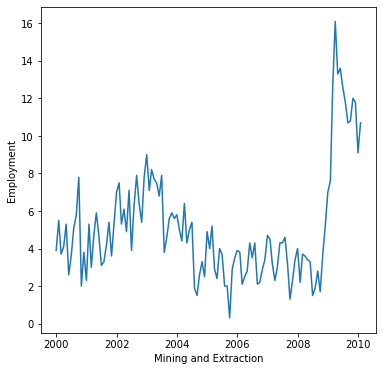

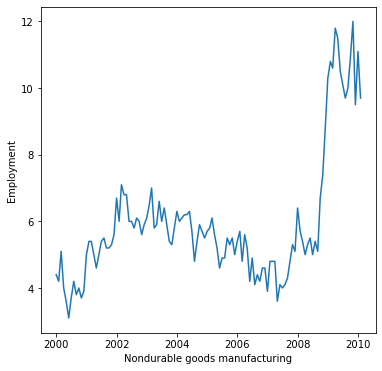

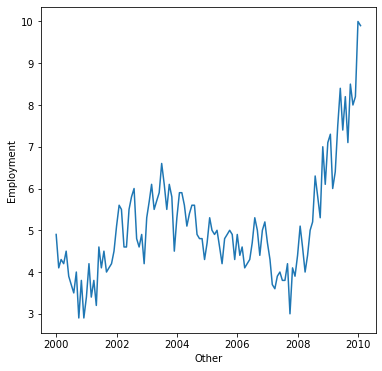

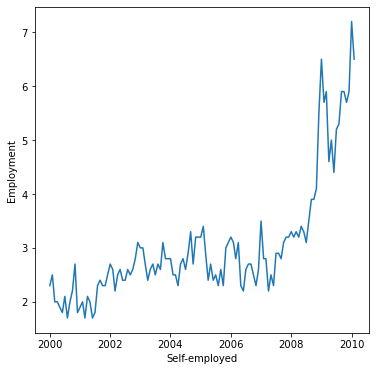

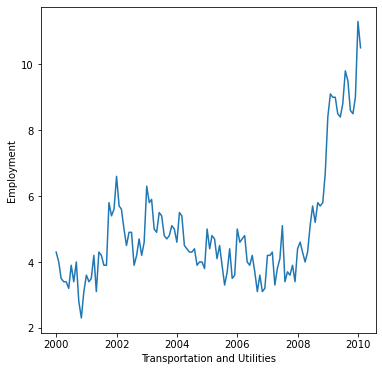

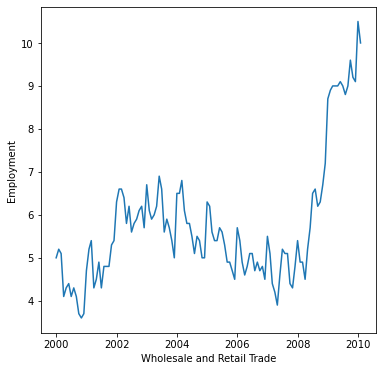

In [499]:
'''Using line chart Visualize the unemployment rate of workers by industry .'''
for i in df:
    fig,ax = plt.subplots(figsize=(6, 6))
    ax.plot(df[i])
    plt.xlabel(i)
    plt.ylabel("Employment")
    

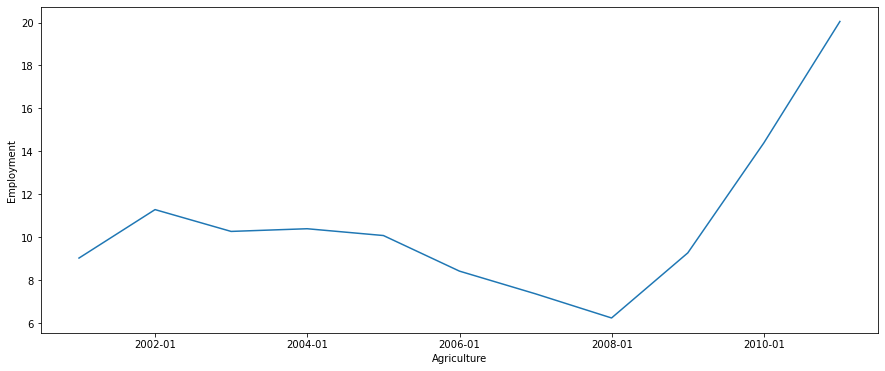

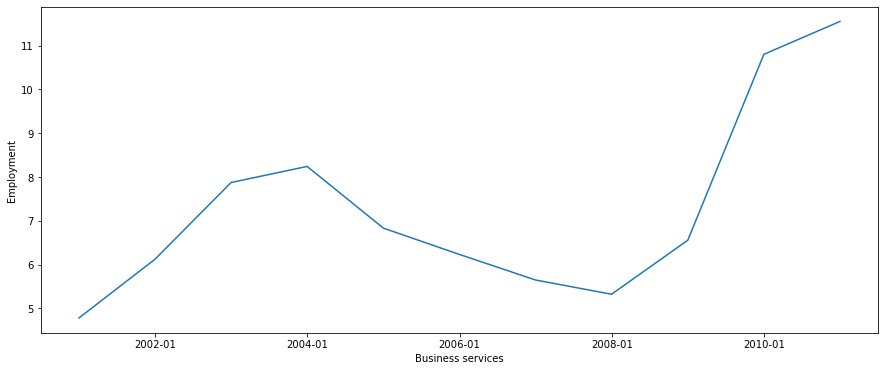

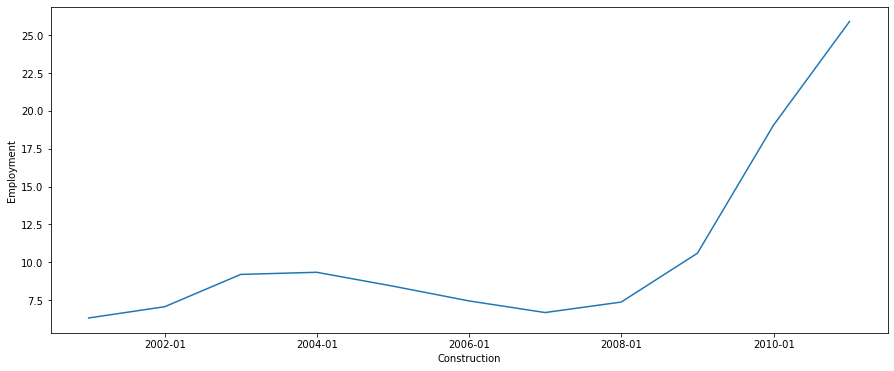

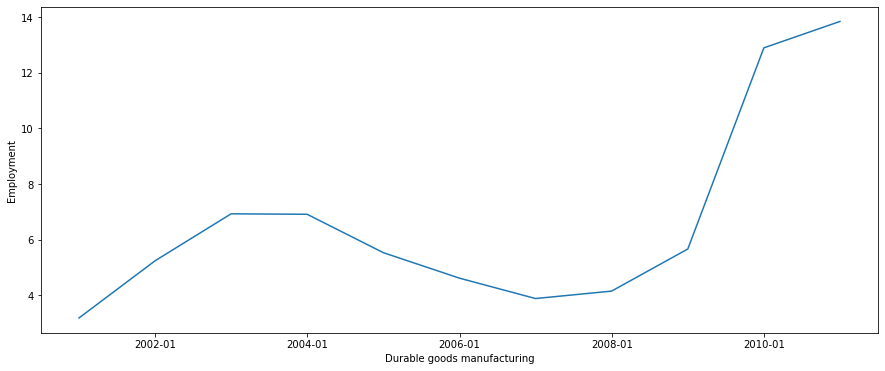

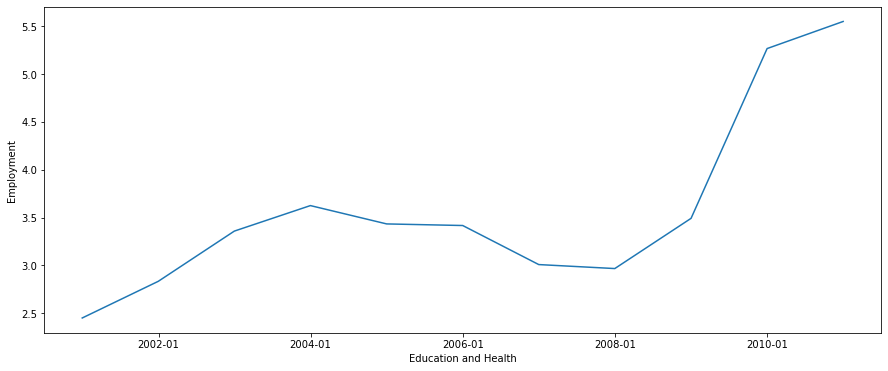

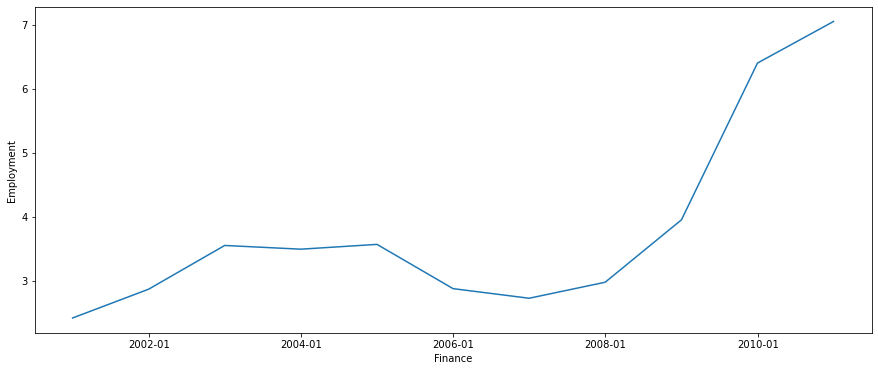

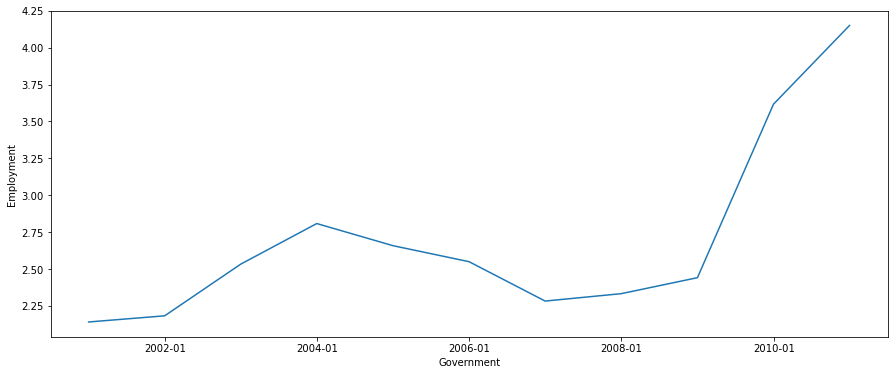

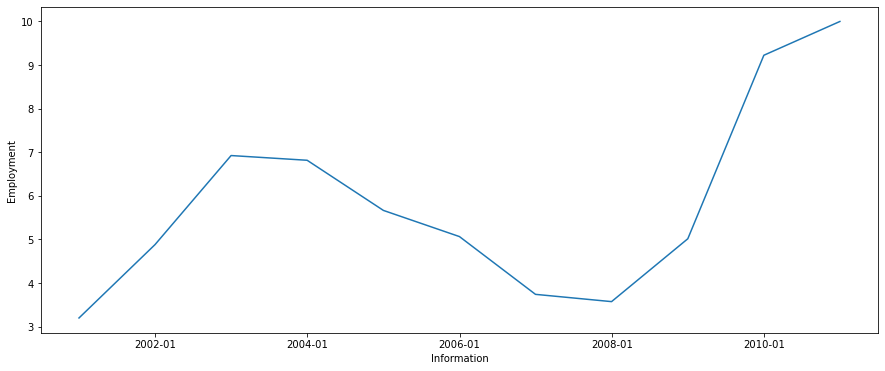

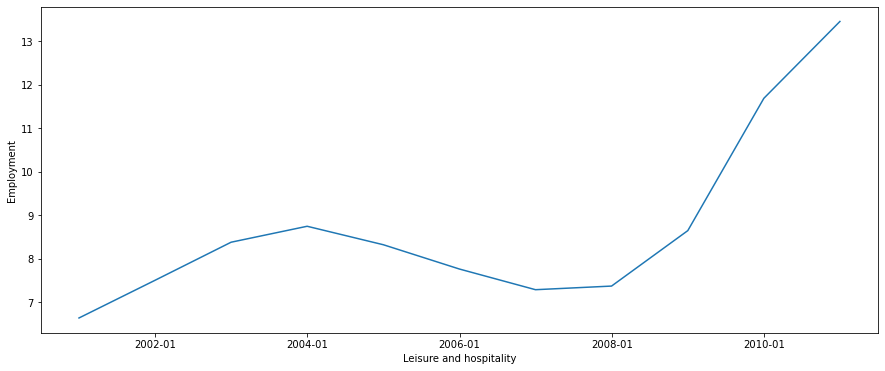

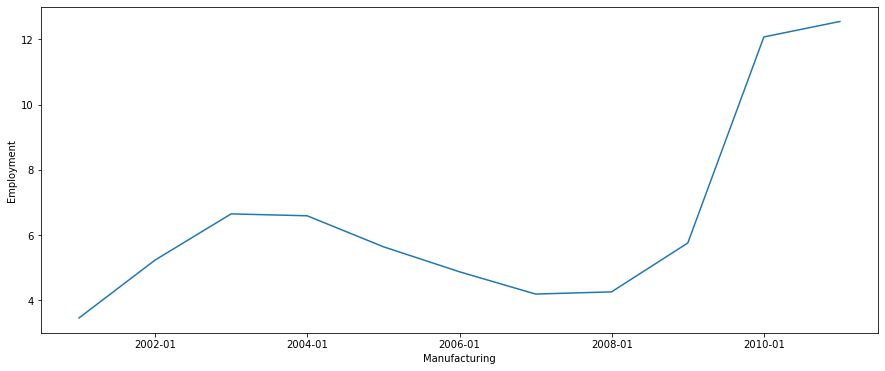

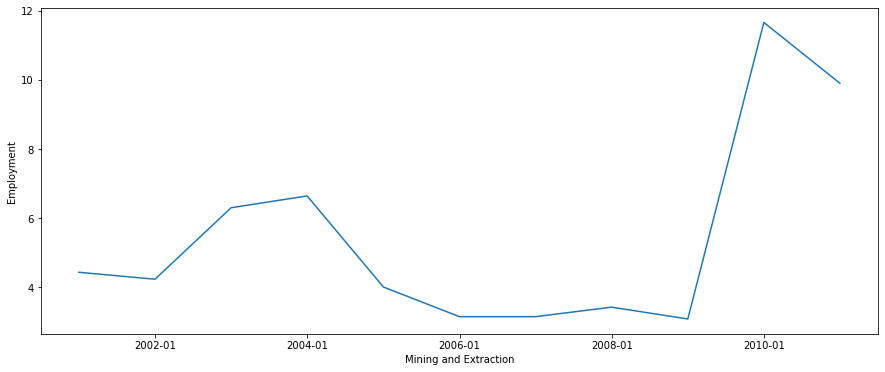

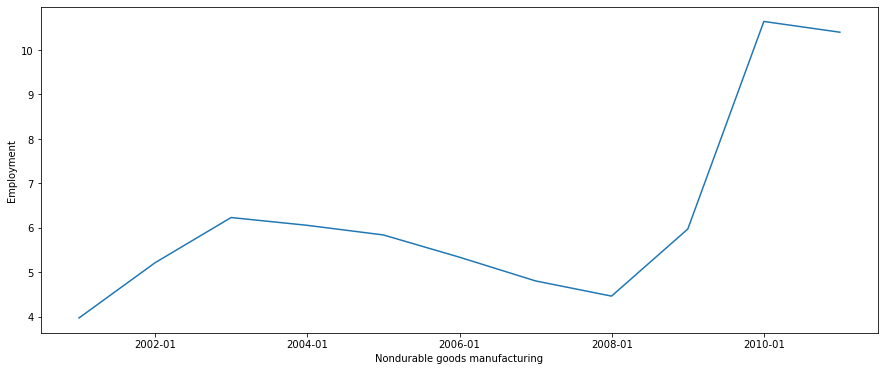

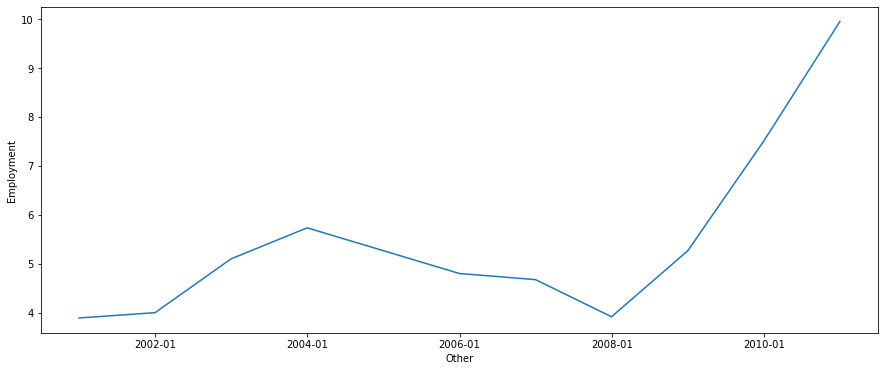

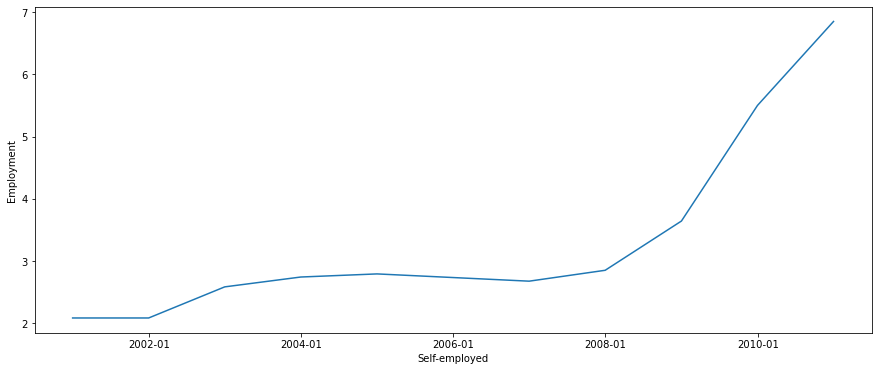

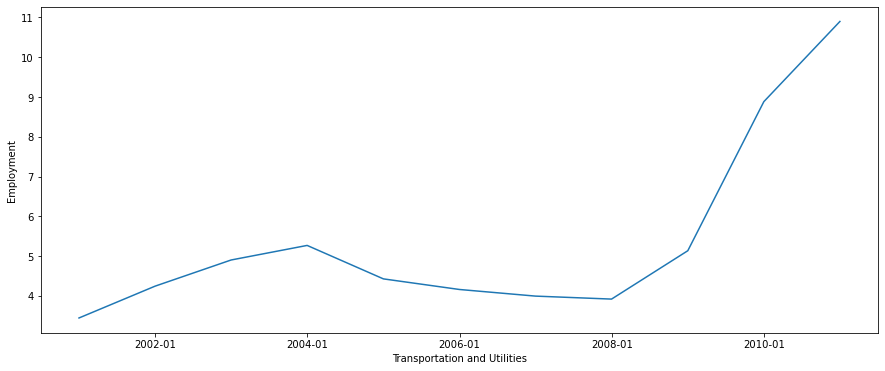

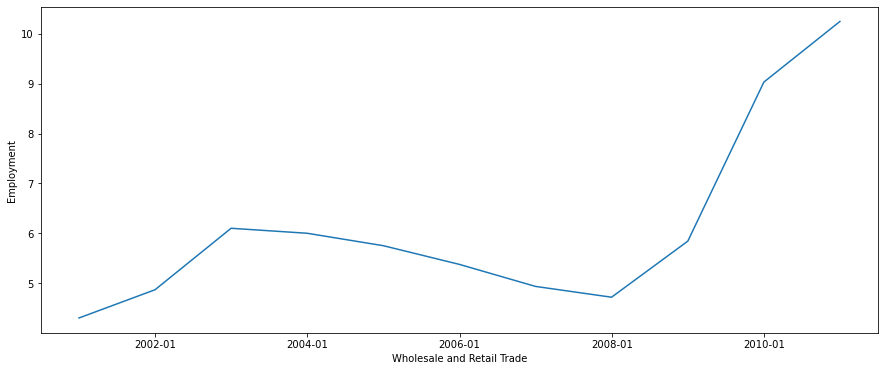

In [500]:
'''Plot the monthly and yearly trends'''

#Yearly


df_semi=df.resample("Y").mean()
for i in df_semi:
    fig,ax = plt.subplots(figsize=(15, 6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.plot(df_semi[i])
    plt.xlabel(i)
    plt.ylabel("Employment")

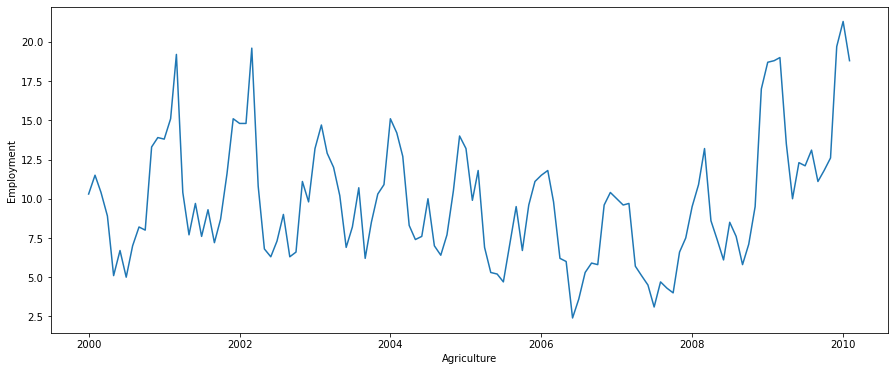

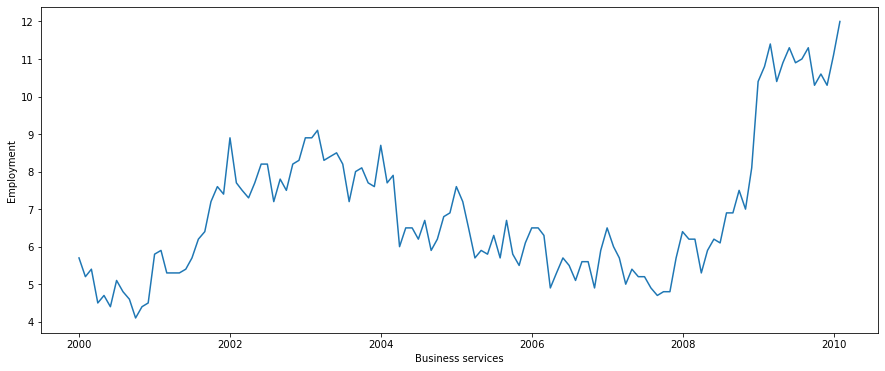

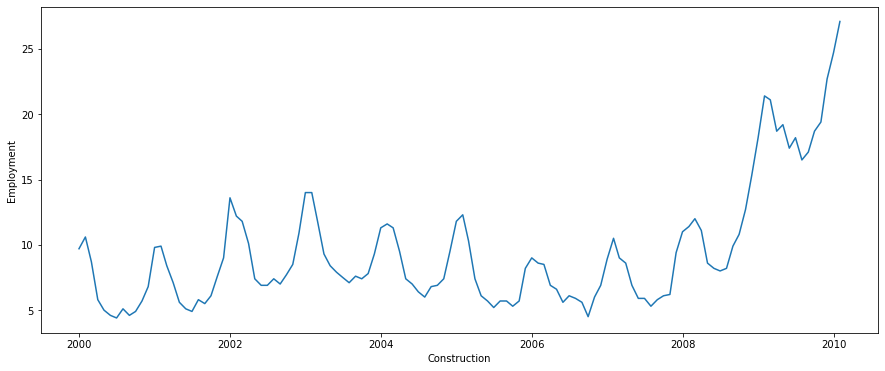

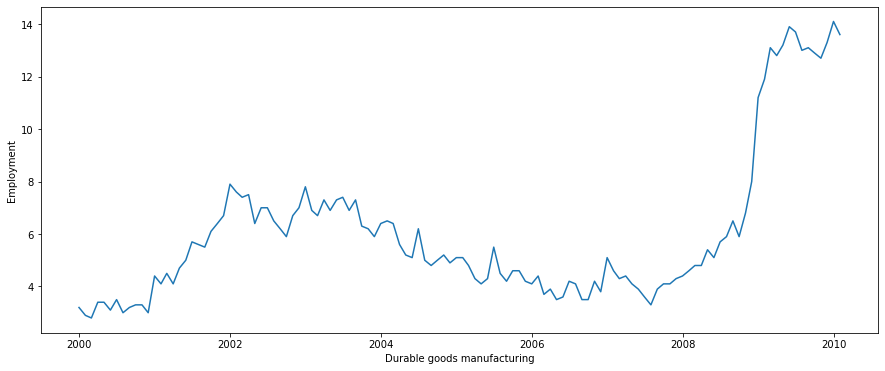

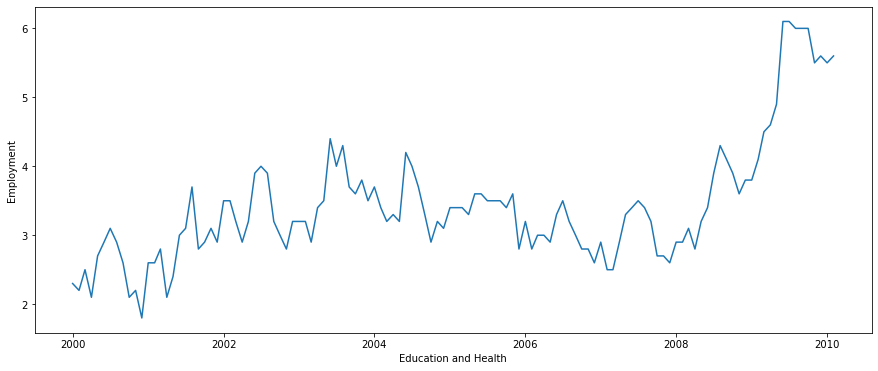

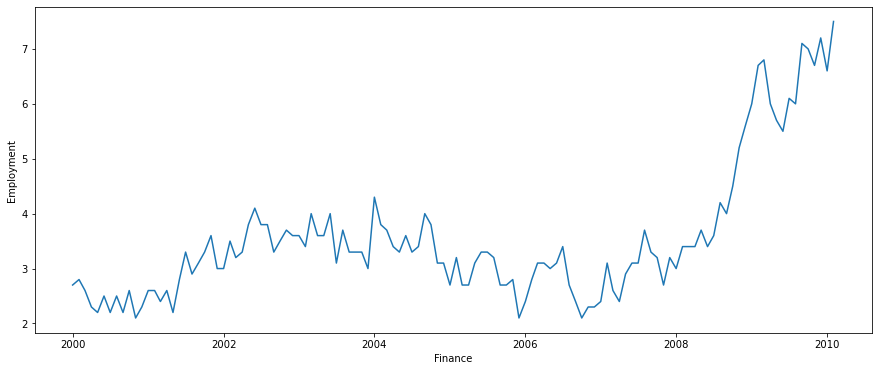

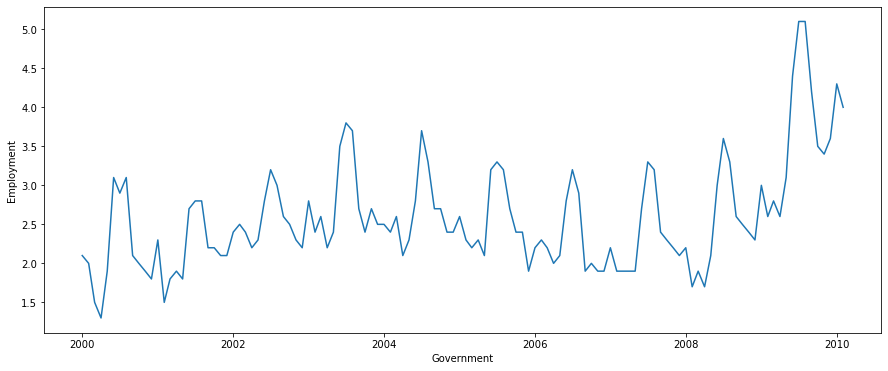

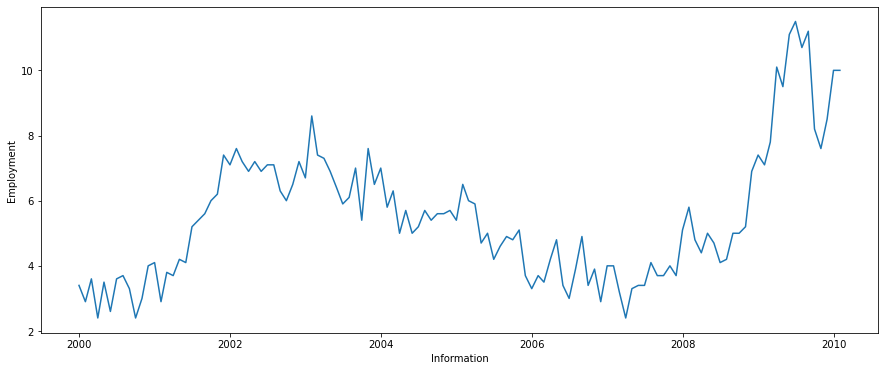

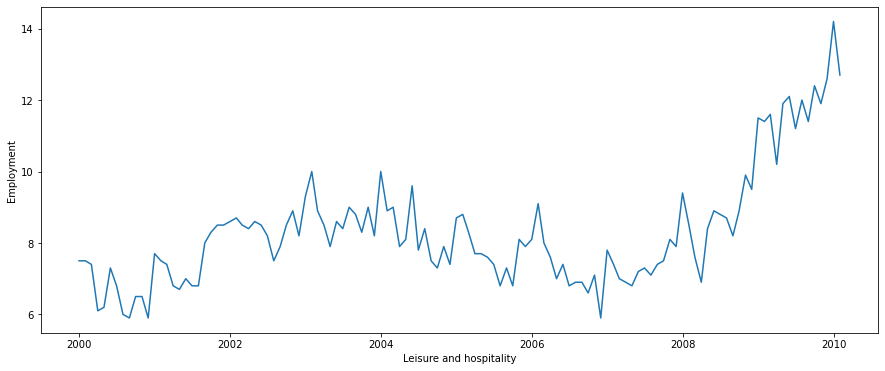

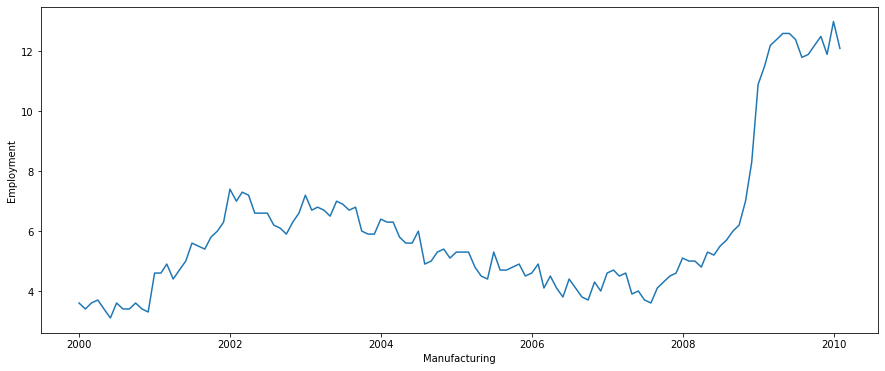

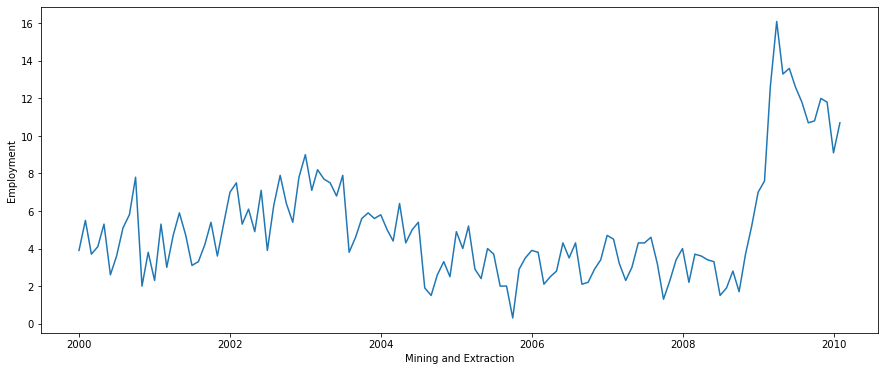

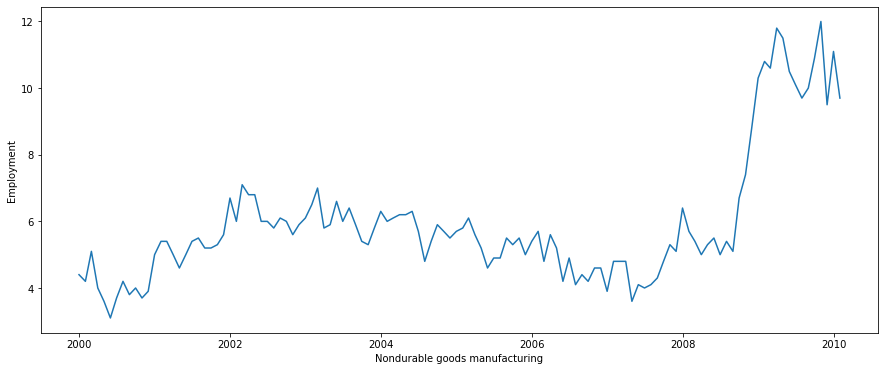

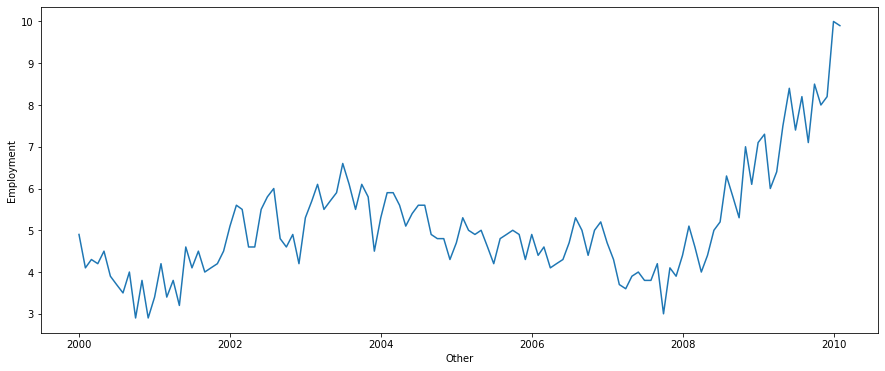

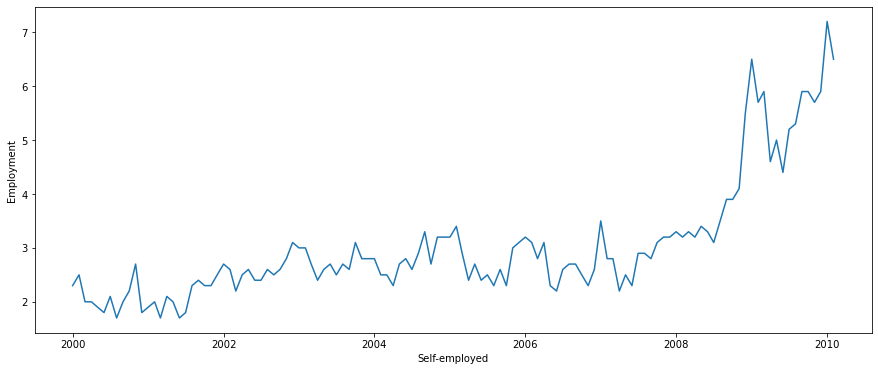

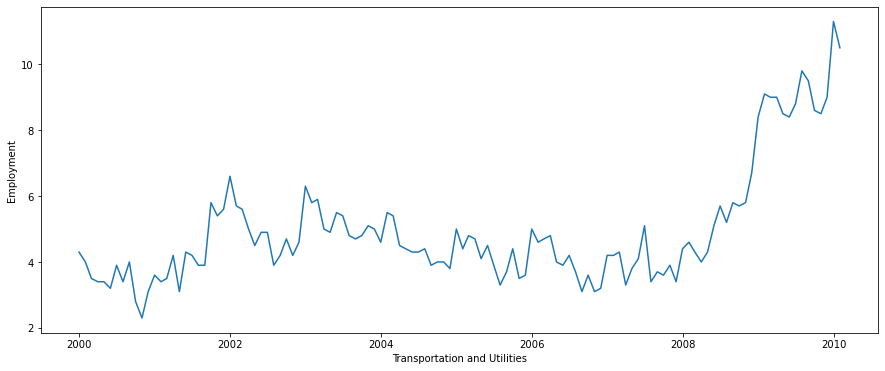

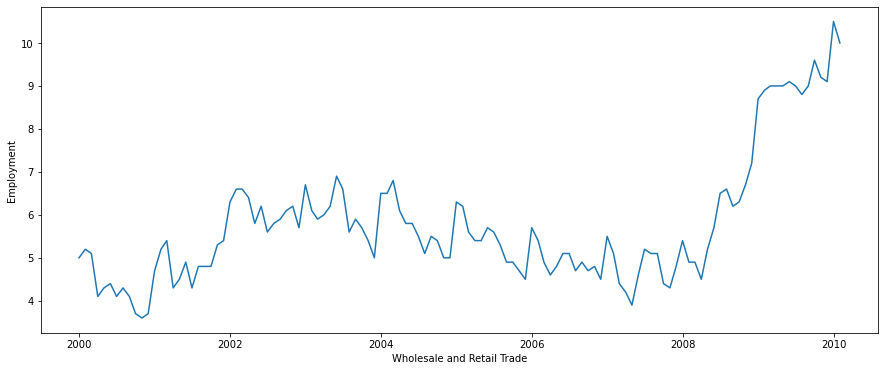

In [501]:
#Monthly

for i in df:
    fig,ax = plt.subplots(figsize=(15, 6))
    ax.plot(df[i])
    plt.xlabel(i)
    plt.ylabel("Employment")

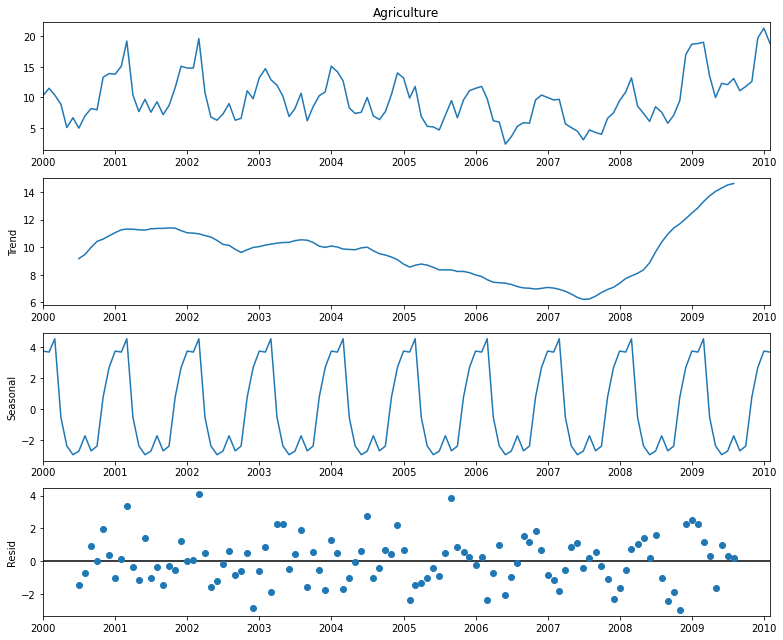

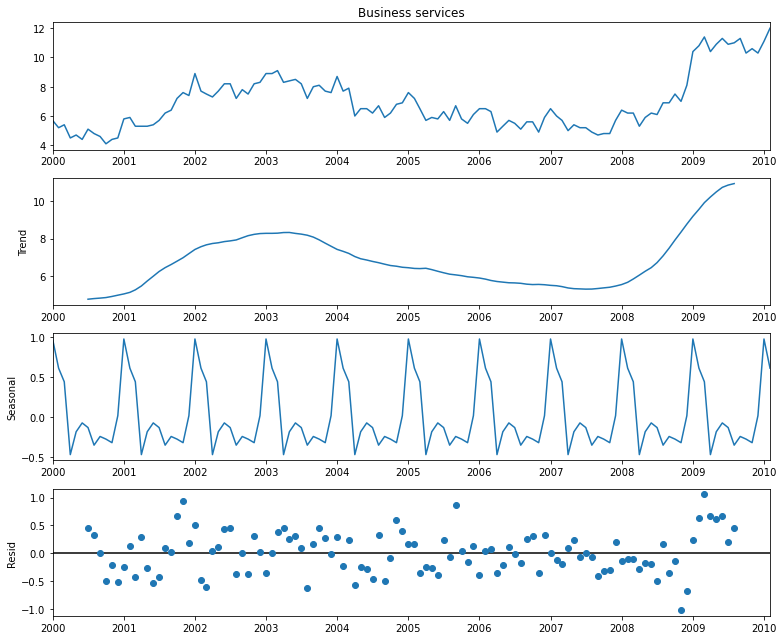

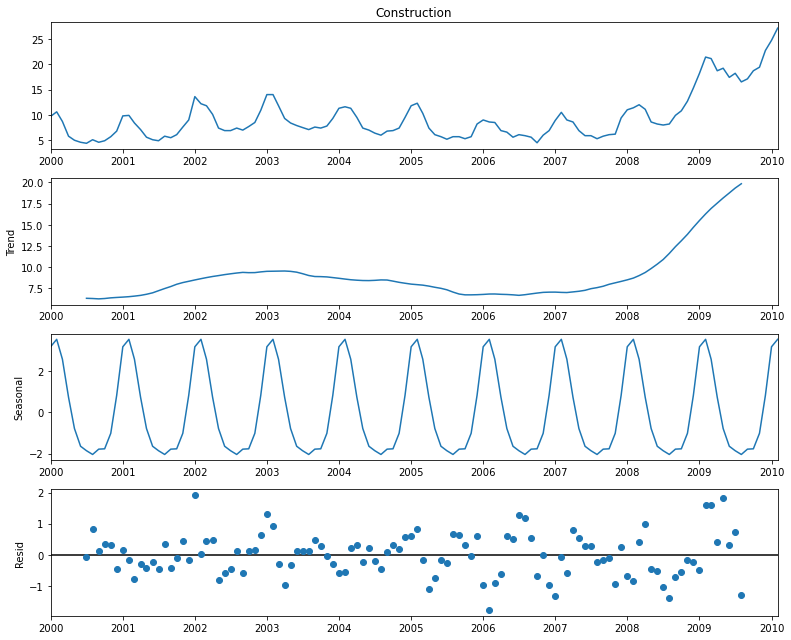

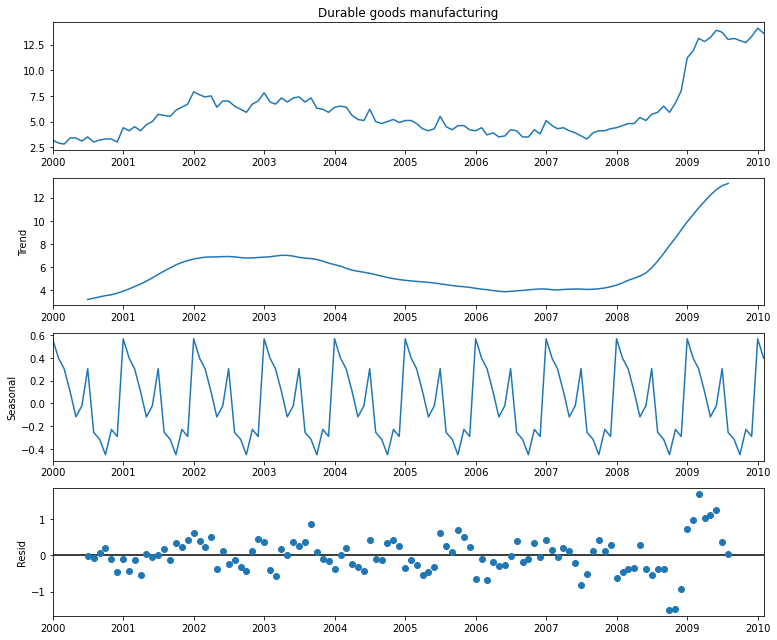

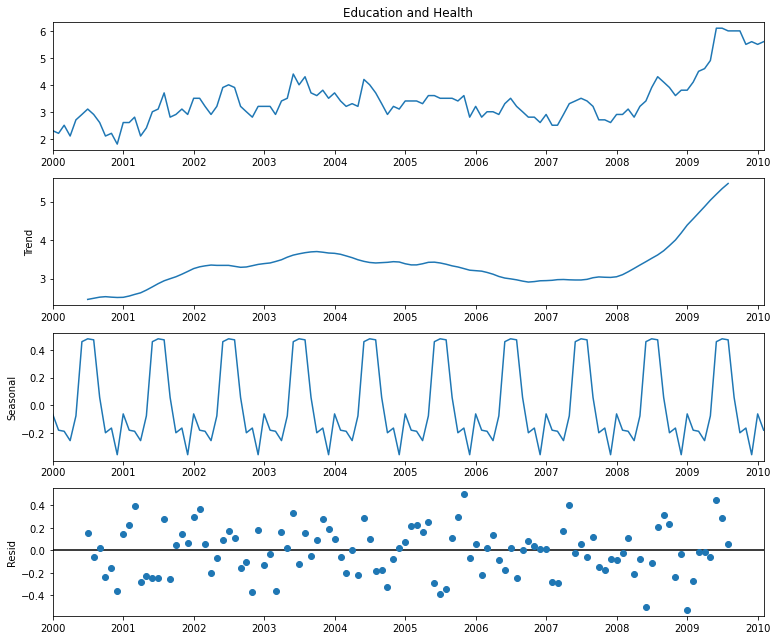

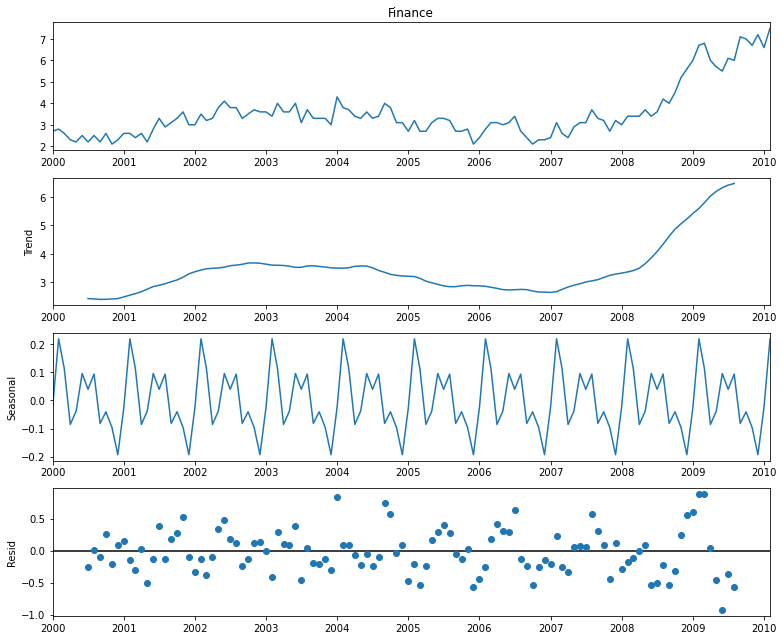

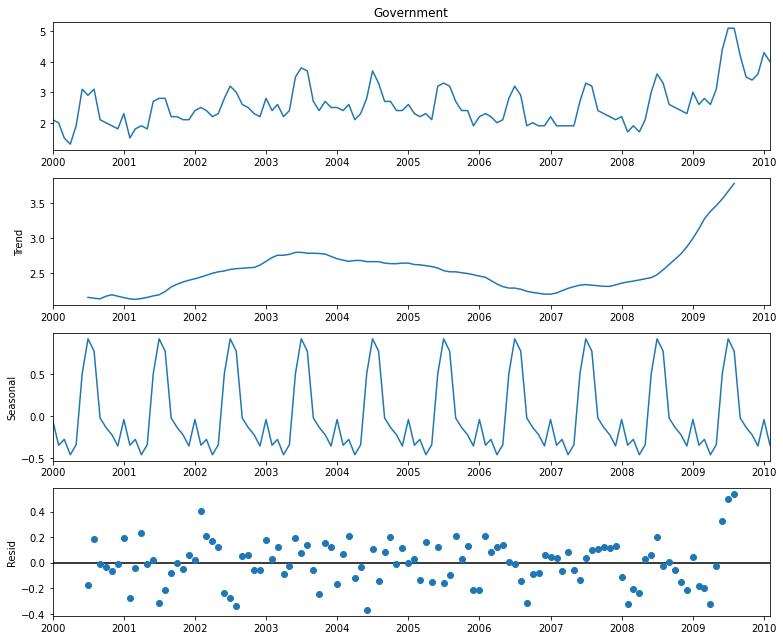

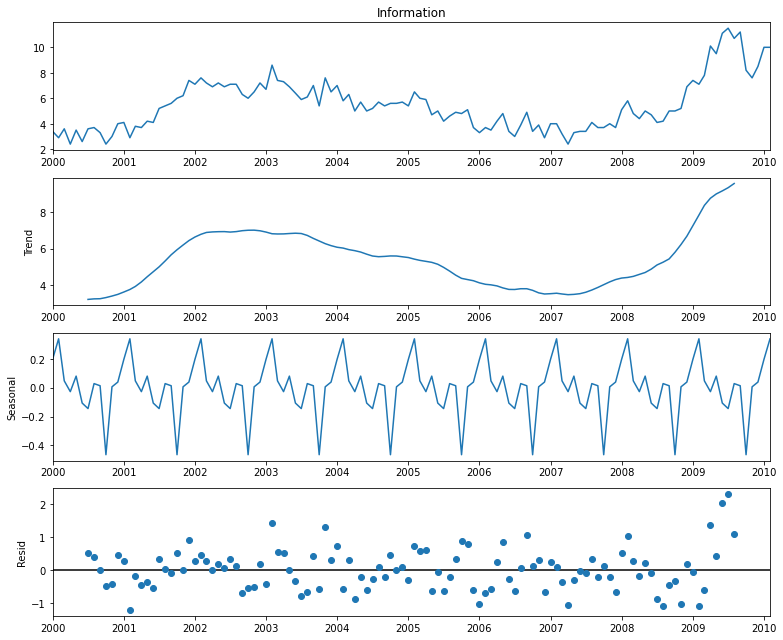

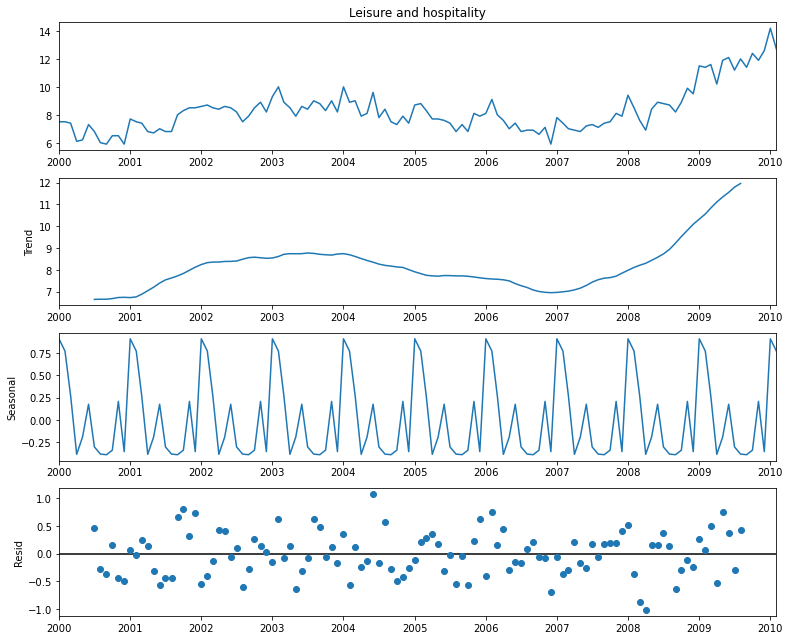

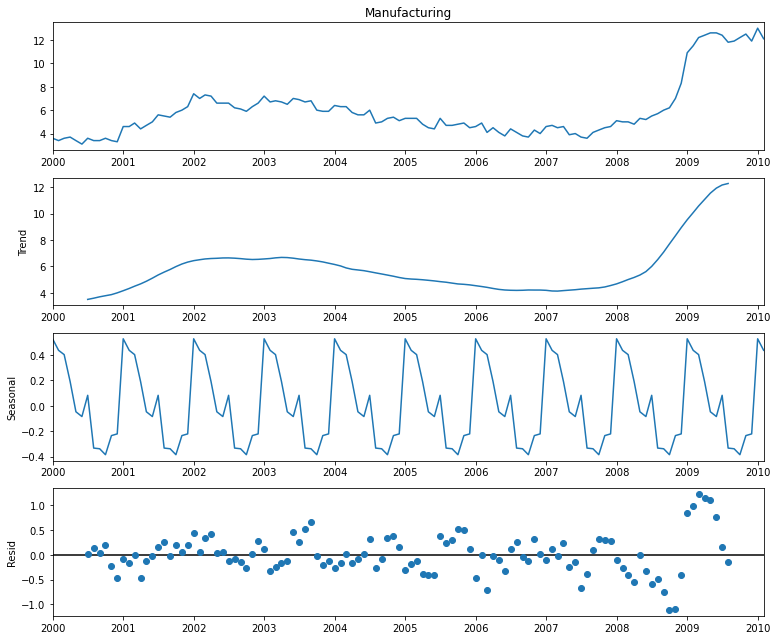

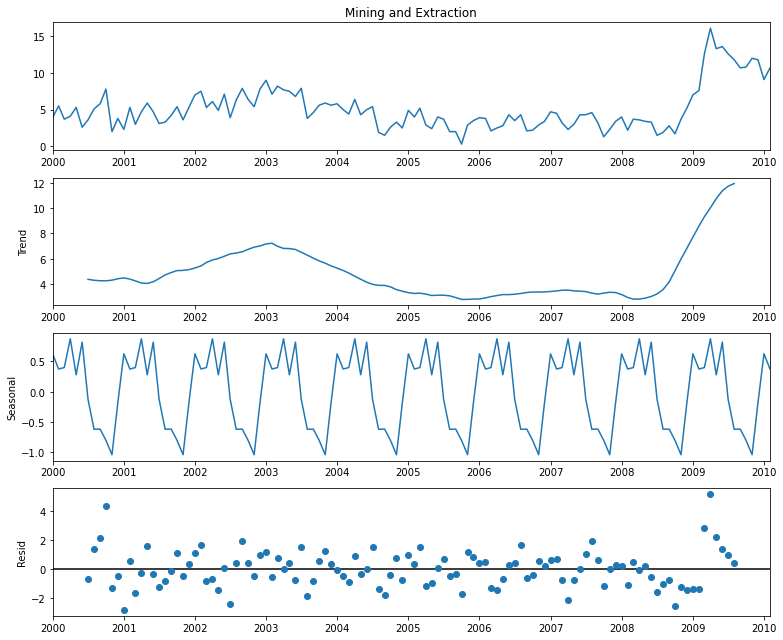

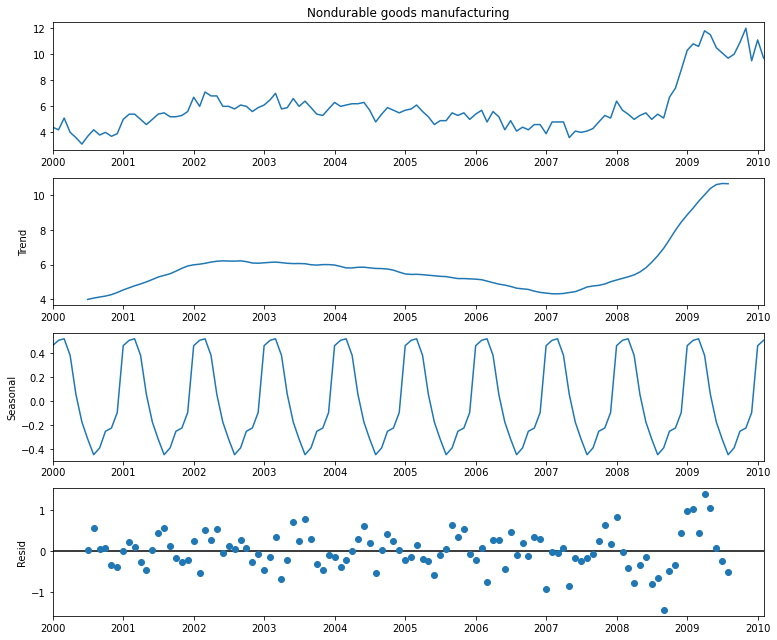

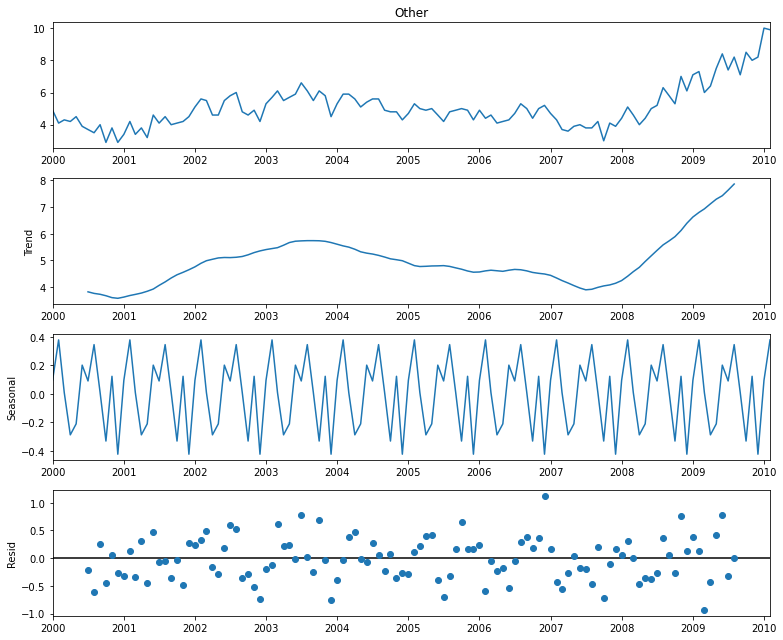

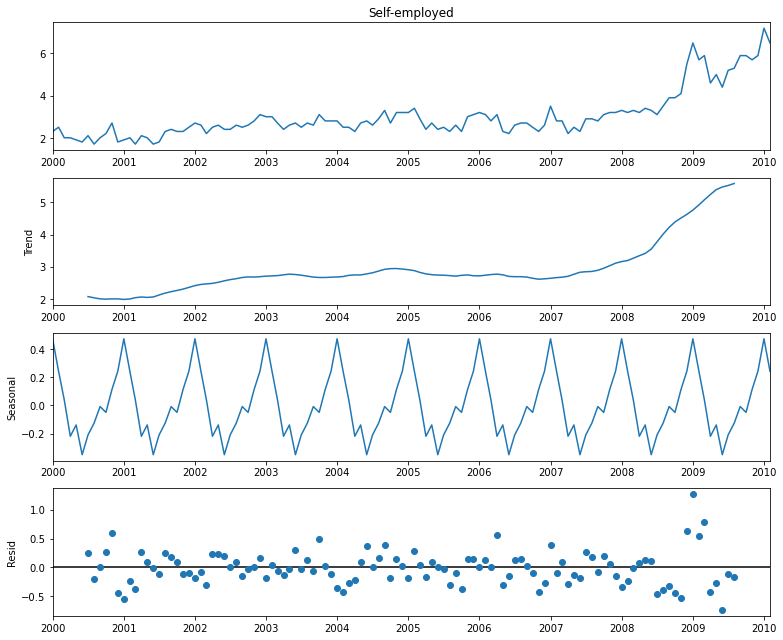

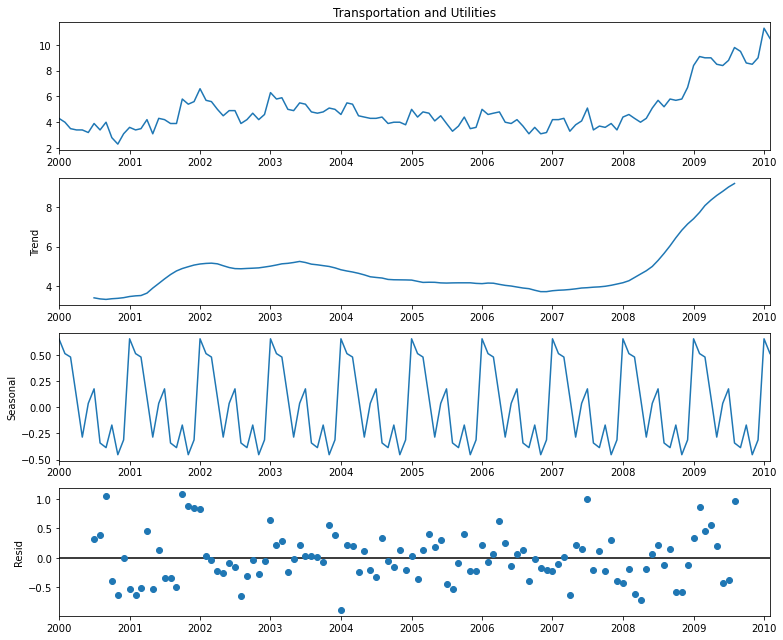

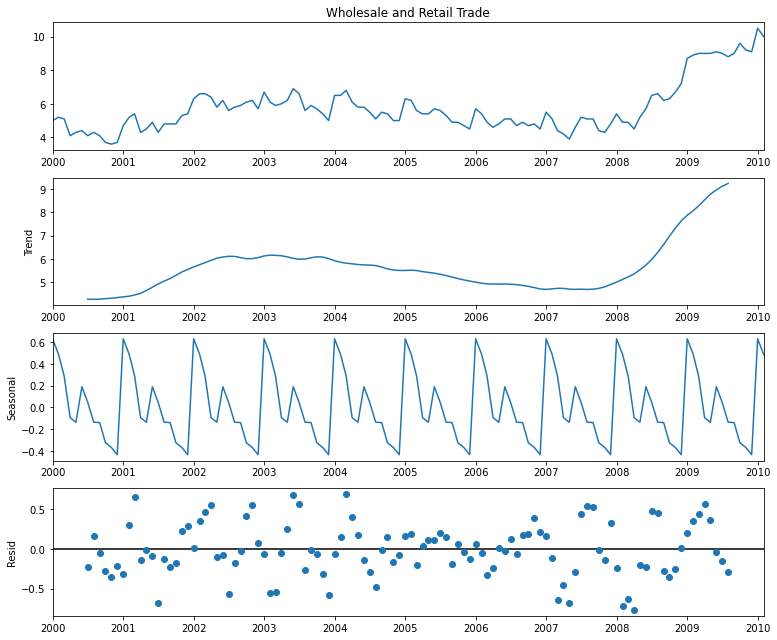

In [502]:
'''Apply time series decomposition to your dataset to visualize the trend and seasonality'''
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
for i in df:
    decomposition = sm.tsa.seasonal_decompose(df[i], model='Additive')
    #The seasonal_decompose() method can take up to six parameters. 
    fig = decomposition.plot()
    plt.show()

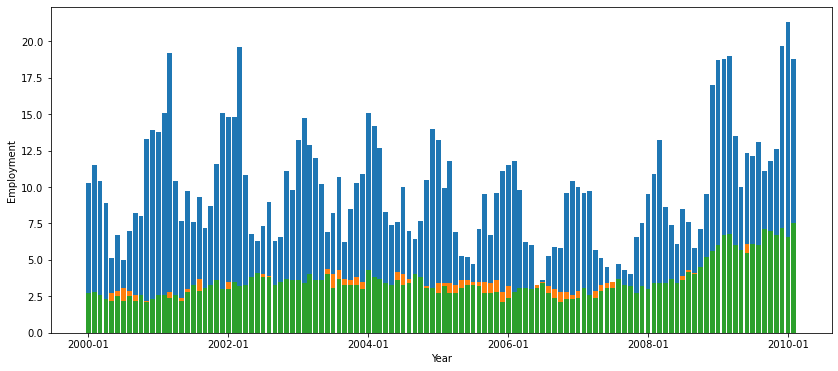

In [503]:
'''Visualize the seasonality of Agriculture, Health and Finance sector'''
df_1=["Agriculture","Education and Health","Finance"]
fig, ax = plt.subplots(figsize=(14,6))
for i in df_1:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.bar(df[:].index, df.loc[:, i], width=25, align='center')
    plt.xlabel("Year")
    plt.ylabel("Employment")


In [504]:
''' Visualize the seasonality of multiple time series and the correlation between each time series 
in the dataset'''
corre=df.corr()
print(corre)

                                Agriculture  Business services  Construction  \
Agriculture                        1.000000           0.584199      0.731070   
Business services                  0.584199           1.000000      0.841629   
Construction                       0.731070           0.841629      1.000000   
Durable goods manufacturing        0.561559           0.942027      0.865205   
Education and Health               0.265195           0.791842      0.666597   
Finance                            0.462156           0.851607      0.850178   
Government                         0.084390           0.581863      0.403237   
Information                        0.497529           0.908446      0.724867   
Leisure and hospitality            0.579209           0.898466      0.884562   
Manufacturing                      0.574365           0.939219      0.879209   
Mining and Extraction              0.464160           0.796754      0.729022   
Nondurable goods manufacturing     0.579

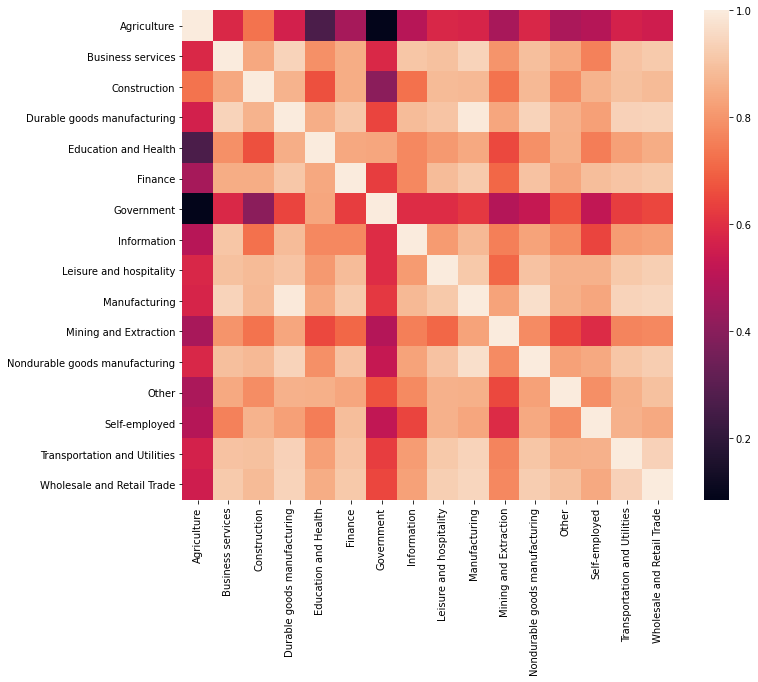

In [505]:
ax=sns.heatmap(corre)
plt.show()